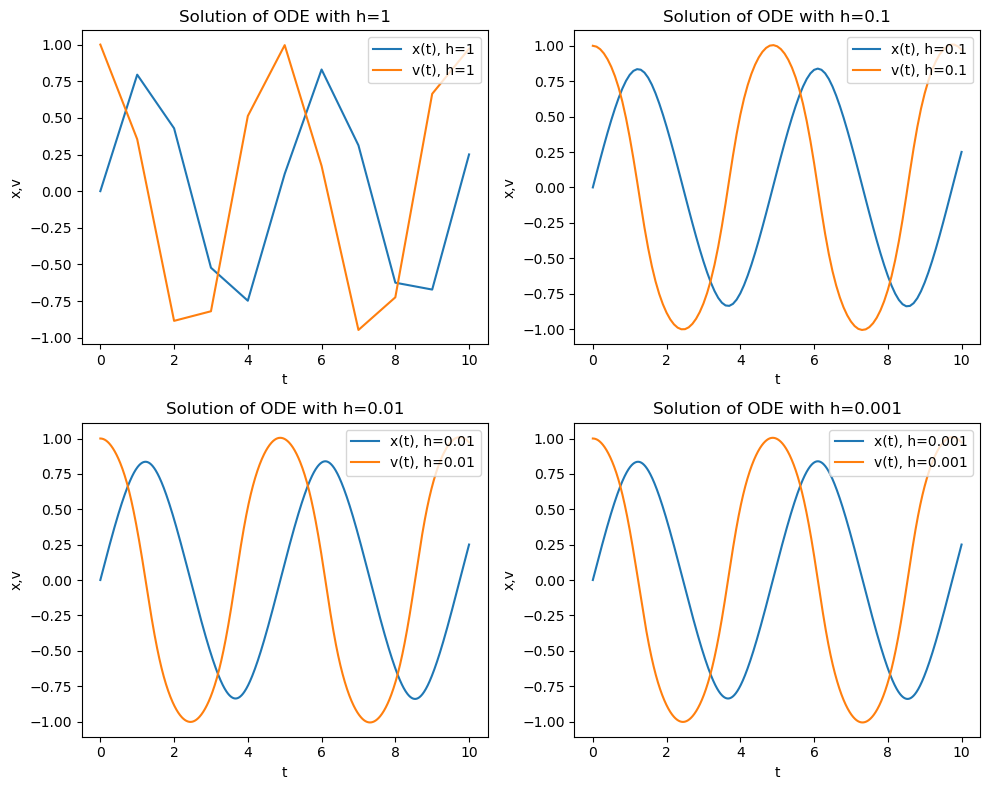

In [13]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def f(t, y):
    x, v = y
    dxdt = v
    dvdt = -1/1.67*(2*x + 2*x*np.tan(x**2)**2)
    return [dxdt, dvdt]

y0 = [0, 1] 
t_span = [0, 10] 

h_values = [1, 0.1, 0.01, 0.001]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()

for i, h in enumerate(h_values):
    t_eval = np.arange(t_span[0], t_span[1]+h, h)
    solution = solve_ivp(f, t_span, y0, method='RK45', t_eval=t_eval)
    axs[i].plot(solution.t, solution.y[0], label=f'x(t), h={h}')
    axs[i].plot(solution.t, solution.y[1], label=f'v(t), h={h}')
    axs[i].set_xlabel('t')
    axs[i].set_ylabel('x,v')
    axs[i].set_title(f'Solution of ODE with h={h}')
    axs[i].legend(loc='upper right')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'the difference between RC4 and Euler')

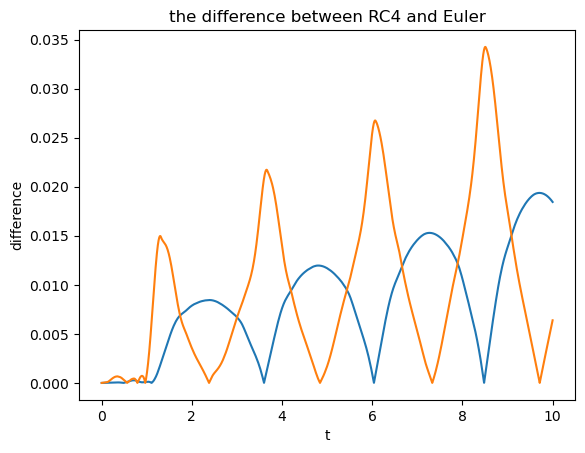

In [14]:
#Графики разности решений между РК4 и Эйлера
data1 = np.loadtxt('X_out.csv')
x_t = data1[:, 0]
x = data1[:, 1]

data2 = np.loadtxt('V_out.csv')
v_t = data2[:, 0]
v = data2[:, 1]

common_x = abs(x - solution.y[0])
common_v = abs(v - solution.y[1])
plt.plot(x_t, common_x)
plt.plot(v_t, common_v)
plt.xlabel('t')
plt.ylabel('difference')
plt.title('the difference between RC4 and Euler')

In [12]:
c = 1
print(x_t[c],v_t[c])
print(solution.y[0][c])
print(solution.y[1][c])

0.0009999 0.0009999
0.0009999998003992136
0.9999994011976645
